In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import mysql.connector


In [85]:
#  Define correct MySQL connection details
connection = mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',               
    password='Ajit@2548',      
    database='crop_yield'     
)

In [86]:
#  Write your SQL query
query = "SELECT * FROM crop_yield.crop_yield;"

# Step 3: Load data into a pandas DataFrame
df = pd.read_sql(query, con=connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\2231234421.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


In [87]:
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Yield_Per_Hectare,Yield_Category
0,Arecanut,1997,Whole Year,Assam,73814,56708,2051.4,7024878.38,22882.34,0.796087,1.078500e-05,Low
1,Arhar/Tur,1997,Kharif,Assam,6637,4685,2051.4,631643.29,2057.47,0.710435,1.070420e-04,Low
2,Castor seed,1997,Kharif,Assam,796,22,2051.4,75755.32,246.76,0.238333,2.994140e-04,Low
3,Coconut,1997,Whole Year,Assam,19656,126905000,2051.4,1870661.52,6093.36,5238.051739,2.664861e-01,High
4,Cotton(lint),1997,Kharif,Assam,1739,794,2051.4,165500.63,539.09,0.420909,2.420410e-04,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
19633,Small millets,1998,Kharif,Nagaland,4000,2000,1498.0,395200.00,1160.00,0.500000,1.250000e-04,Low
19634,Wheat,1998,Rabi,Nagaland,1000,3000,1498.0,98800.00,290.00,3.000000,3.000000e-03,Low
19635,Maize,1997,Kharif,Jammu and Kashmir,310883,440900,1356.2,29586735.11,96373.73,1.285000,4.133390e-06,Low
19636,Rice,1997,Kharif,Jammu and Kashmir,275746,5488,1356.2,26242746.82,85481.26,0.016667,6.044210e-08,Low


In [88]:

#  Check Data Types
print("Column Data Types:\n", df.dtypes)


Column Data Types:
 Crop                  object
Crop_Year              int64
Season                object
State                 object
Area                   int64
Production             int64
Annual_Rainfall      float64
Fertilizer           float64
Pesticide            float64
Yield                float64
Yield_Per_Hectare    float64
Yield_Category        object
dtype: object


In [89]:
# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 Crop                 0
Crop_Year            0
Season               0
State                0
Area                 0
Production           0
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield                0
Yield_Per_Hectare    0
Yield_Category       0
dtype: int64


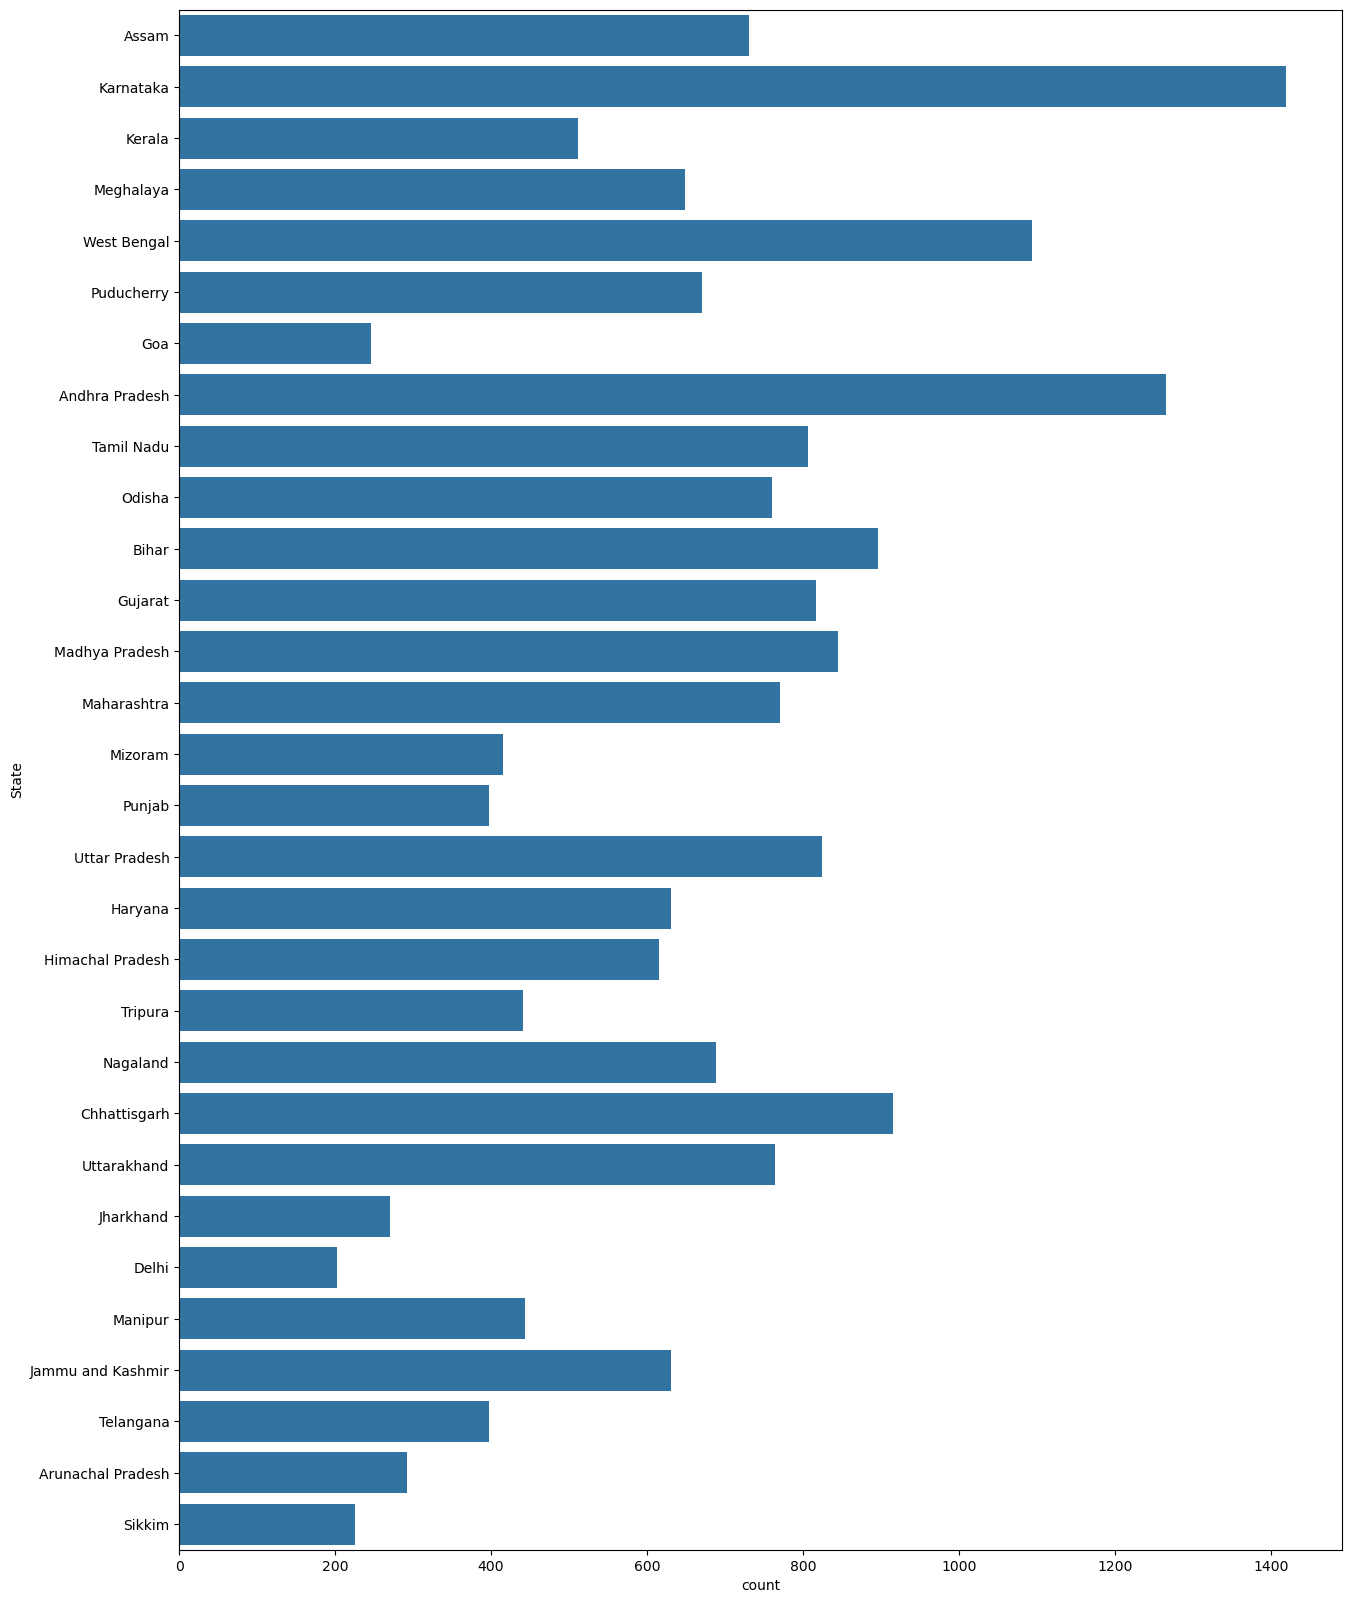

In [90]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['State'])
plt.show()

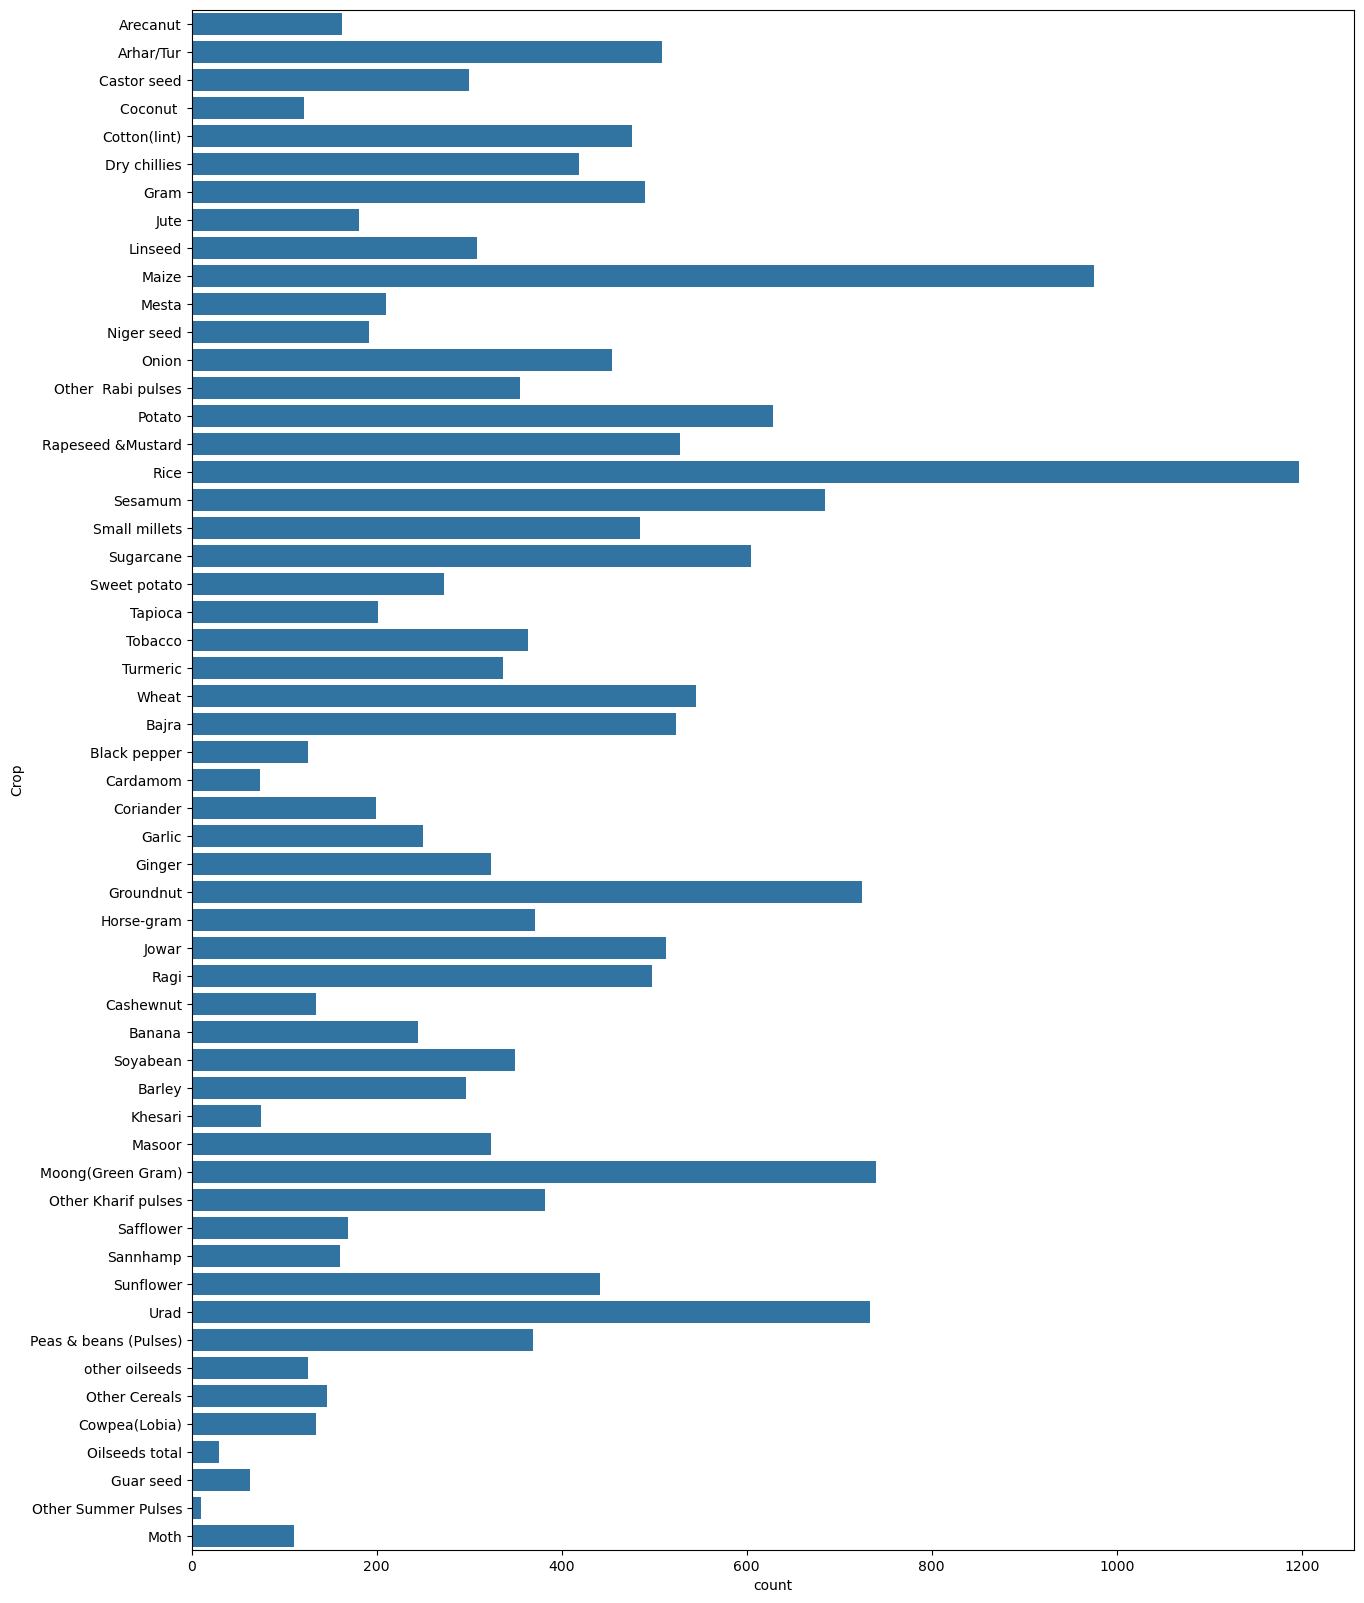

In [91]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Crop'])
plt.show()

In [92]:
if 'Yield_Category' in df.columns:
    df.drop(columns=['Yield_Category'], inplace=True)


In [93]:
 # Handle missing values
df.dropna(subset=['Crop_Year', 'State', 'Yield_Per_Hectare'], inplace=True)


In [94]:
# Encode categorical features

label_encoders = {}
for col in ['Crop', 'Season', 'State']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [95]:
# Convert other columns to numeric
numeric_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                'Fertilizer', 'Pesticide', 'Yield', 'Yield_Per_Hectare']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [96]:
#  Remove rows with remaining NaN (after conversion)
df.dropna(inplace=True)

In [97]:
# Define features and target
features = ['Crop_Year', 'Crop', 'Season', 'State', 'Area',
            'Annual_Rainfall', 'Fertilizer', 'Pesticide']
target = 'Yield_Per_Hectare'

X = df[features]
y = df[target]


In [98]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [100]:
# Evaluate model
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.7228553314094122
RMSE: 0.5747118441171638


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
#Generate future prediction data (2025-2030)
states = label_encoders['State'].classes_
crops = label_encoders['Crop'].classes_
seasons = label_encoders['Season'].classes_

future_data = []
for year in range(2025, 2031):
    for state in states:
        for crop in crops:
            for season in seasons:
                row = {
                    'Crop_Year': year,
                    'Crop': label_encoders['Crop'].transform([crop])[0],
                    'Season': label_encoders['Season'].transform([season])[0],
                    'State': label_encoders['State'].transform([state])[0],
                    'Area': np.random.uniform(400, 1200),
                    'Annual_Rainfall': np.random.uniform(500, 800),
                    'Fertilizer': np.random.uniform(40, 80),
                    'Pesticide': np.random.uniform(10, 40)
                }
                future_data.append(row)

future_df = pd.DataFrame(future_data)

In [102]:
#  Predict future yield
future_df['Yield_Per_Hectare'] = model.predict(future_df[features])


In [103]:
# Decode for readability
future_df['Crop'] = label_encoders['Crop'].inverse_transform(future_df['Crop'])
future_df['Season'] = label_encoders['Season'].inverse_transform(future_df['Season'])
future_df['State'] = label_encoders['State'].inverse_transform(future_df['State'])


In [104]:
# Summarize Results
yearly_summary = future_df.groupby('Crop_Year').agg({
    'Yield_Per_Hectare': 'mean',
    'Area': 'sum',
    'Annual_Rainfall': 'mean'
}).reset_index()

In [105]:
state_summary = future_df.groupby('State').agg({
    'Yield_Per_Hectare': 'mean'
}).reset_index().sort_values(by='Yield_Per_Hectare', ascending=False)

print("\nTop States by Avg Yield per Hectare:")
print(state_summary.head())

print("\nYearly Summary:")
print(yearly_summary)


Top States by Avg Yield per Hectare:
               State  Yield_Per_Hectare
0     Andhra Pradesh           7.050296
1  Arunachal Pradesh           7.014664
2              Assam           6.979749
5              Delhi           6.898651
4       Chhattisgarh           6.880624

Yearly Summary:
   Crop_Year  Yield_Per_Hectare          Area  Annual_Rainfall
0       2025           6.162671  7.963056e+06       650.235703
1       2026           6.174082  7.940356e+06       649.838269
2       2027           6.197277  7.910127e+06       648.945940
3       2028           6.194993  7.972958e+06       649.741447
4       2029           6.183440  7.914991e+06       650.502620
5       2030           6.184213  7.906546e+06       650.363660


In [108]:
#  Save future predictions to CSV
future_df.to_csv("future_yield_predictions_2025_2030.csv", index=False)


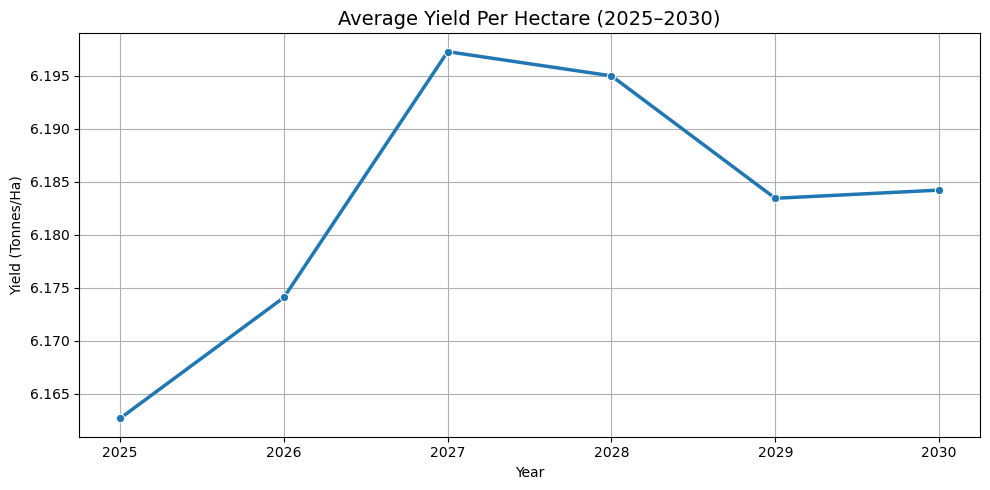

In [109]:
# 1. Line Plot: Yield per Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_summary, x='Crop_Year', y='Yield_Per_Hectare', marker='o', linewidth=2.5)
plt.title('Average Yield Per Hectare (2025–2030)', fontsize=14)
plt.ylabel('Yield (Tonnes/Ha)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

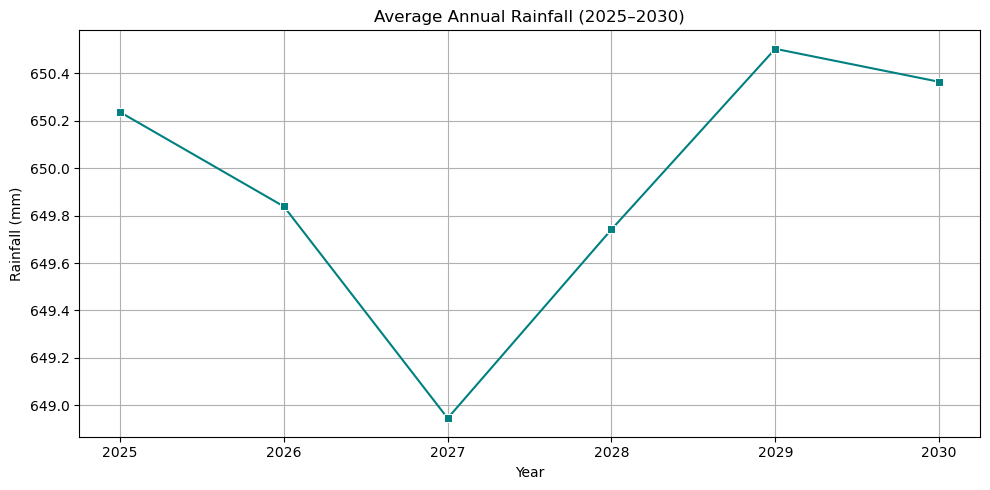

In [120]:

# Line Plot: Rainfall per Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_summary, x='Crop_Year', y='Annual_Rainfall', marker='s', color='teal')
plt.title('Average Annual Rainfall (2025–2030)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3683980578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.head(10), x='Yield_Per_Hectare', y='State', palette='viridis')


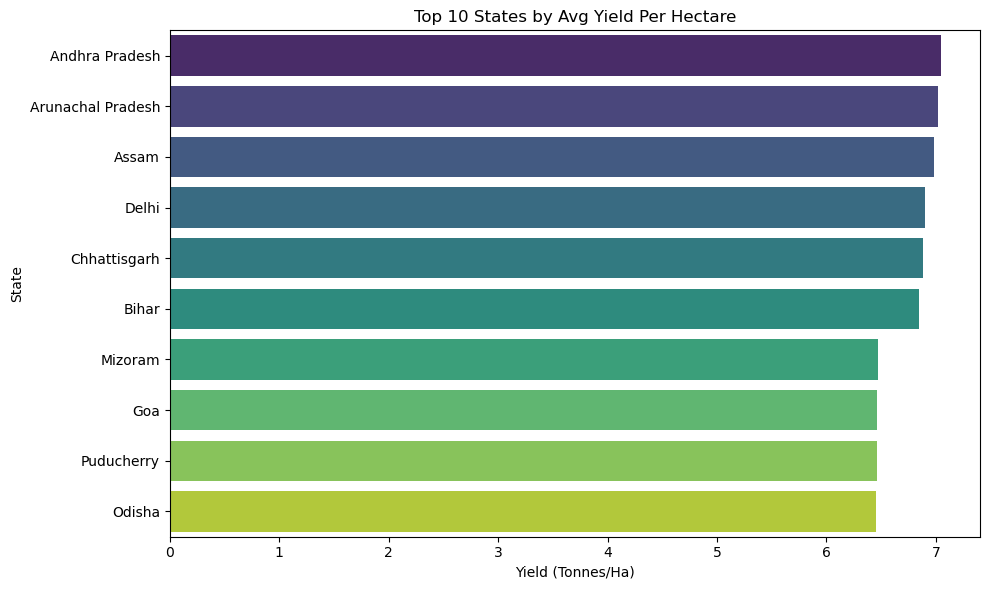

In [110]:
# Bar Plot: Top States by Avg Yield
plt.figure(figsize=(10, 6))
sns.barplot(data=state_summary.head(10), x='Yield_Per_Hectare', y='State', palette='viridis')
plt.title('Top 10 States by Avg Yield Per Hectare')
plt.xlabel('Yield (Tonnes/Ha)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3010738173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=future_df, x='Crop', y='Yield_Per_Hectare', palette='Set2')


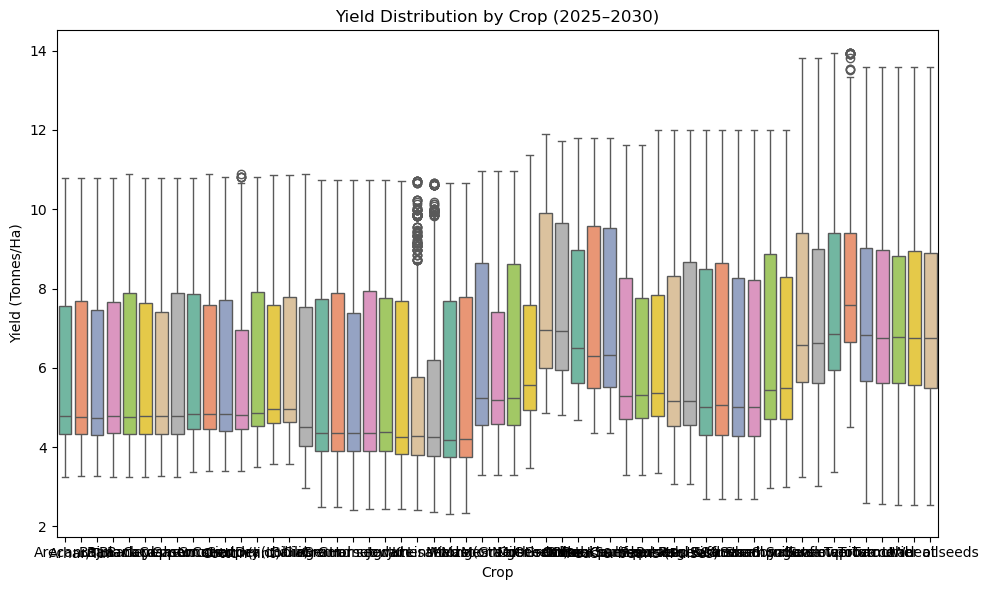

In [112]:
#  Box Plot: Yield by Crop
plt.figure(figsize=(10, 6))
sns.boxplot(data=future_df, x='Crop', y='Yield_Per_Hectare', palette='Set2')
plt.title('Yield Distribution by Crop (2025–2030)')
plt.xlabel('Crop')
plt.ylabel('Yield (Tonnes/Ha)')
plt.tight_layout()
plt.show()

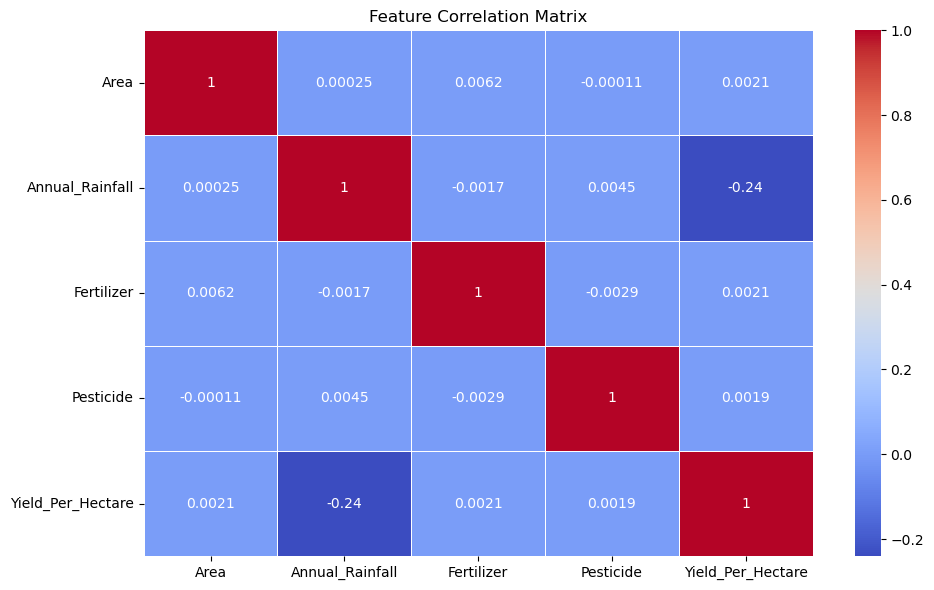

In [113]:
#  Heatmap: Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(future_df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield_Per_Hectare']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

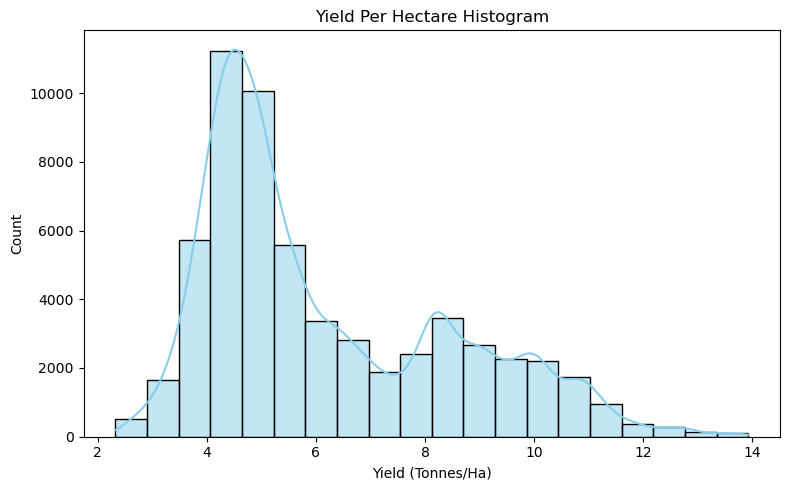

In [119]:
# Histogram: Yield Histogram
plt.figure(figsize=(8, 5))
sns.histplot(future_df['Yield_Per_Hectare'], bins=20, kde=True, color='skyblue')
plt.title('Yield Per Hectare Histogram')
plt.xlabel('Yield (Tonnes/Ha)')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\1108048073.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


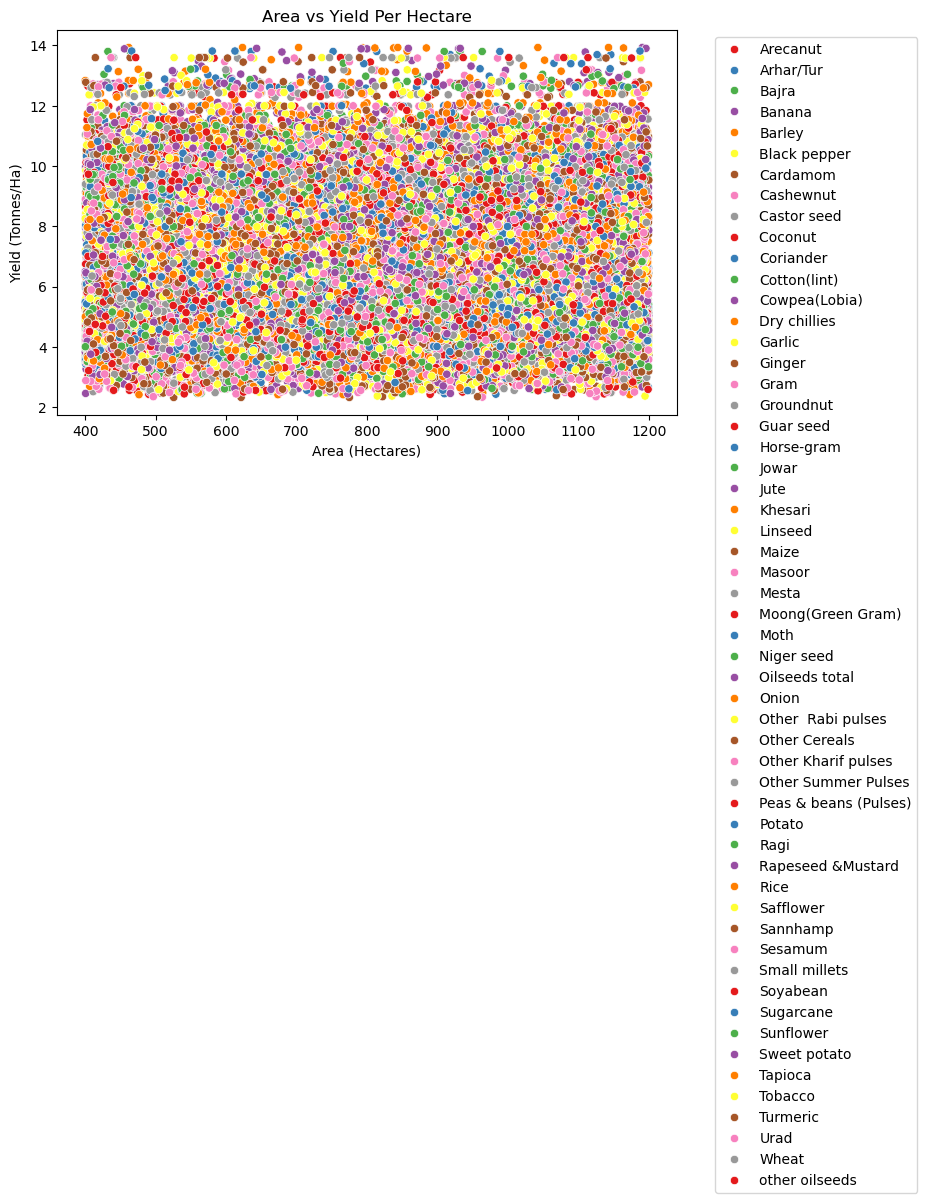

In [121]:
# Scatter Plot: Area vs Yield
plt.figure(figsize=(8, 5))
sns.scatterplot(data=future_df, x='Area', y='Yield_Per_Hectare', hue='Crop', palette='Set1')
plt.title('Area vs Yield Per Hectare')
plt.xlabel('Area (Hectares)')
plt.ylabel('Yield (Tonnes/Ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3482702787.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=future_df, x='Crop', y='Pesticide', estimator=np.mean, ci=None, palette='magma')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3482702787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=future_df, x='Crop', y='Pesticide', estimator=np.mean, ci=None, palette='magma')


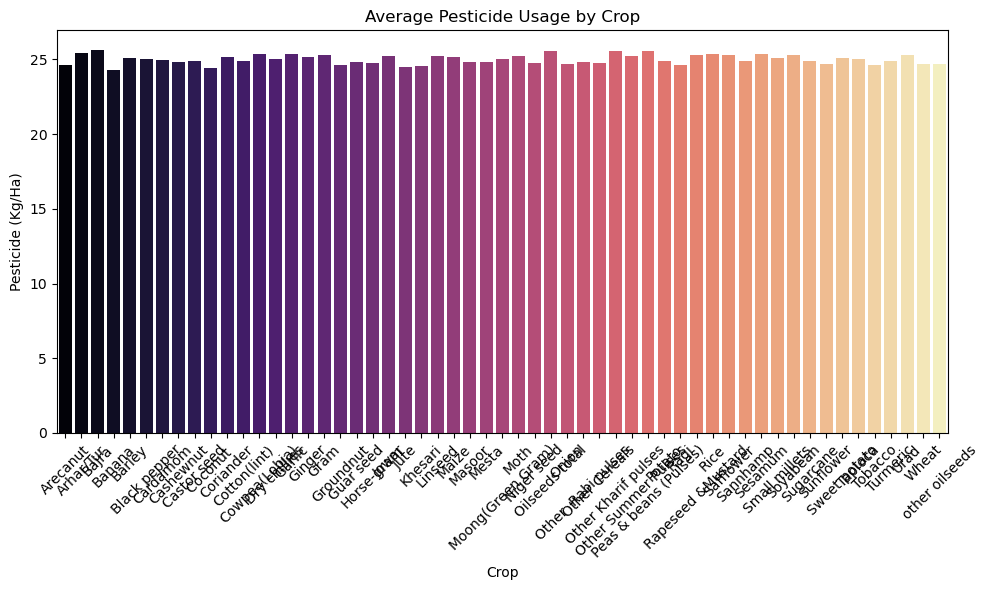

In [122]:
# Bar Plot: Pesticide Usage by Crop
plt.figure(figsize=(10, 6))
sns.barplot(data=future_df, x='Crop', y='Pesticide', estimator=np.mean, ci=None, palette='magma')
plt.title('Average Pesticide Usage by Crop')
plt.ylabel('Pesticide (Kg/Ha)')
plt.xlabel('Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3217566753.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=future_df, x='Crop', y='Fertilizer', estimator=np.mean, ci=None, palette='cool')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_244888\3217566753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=future_df, x='Crop', y='Fertilizer', estimator=np.mean, ci=None, palette='cool')


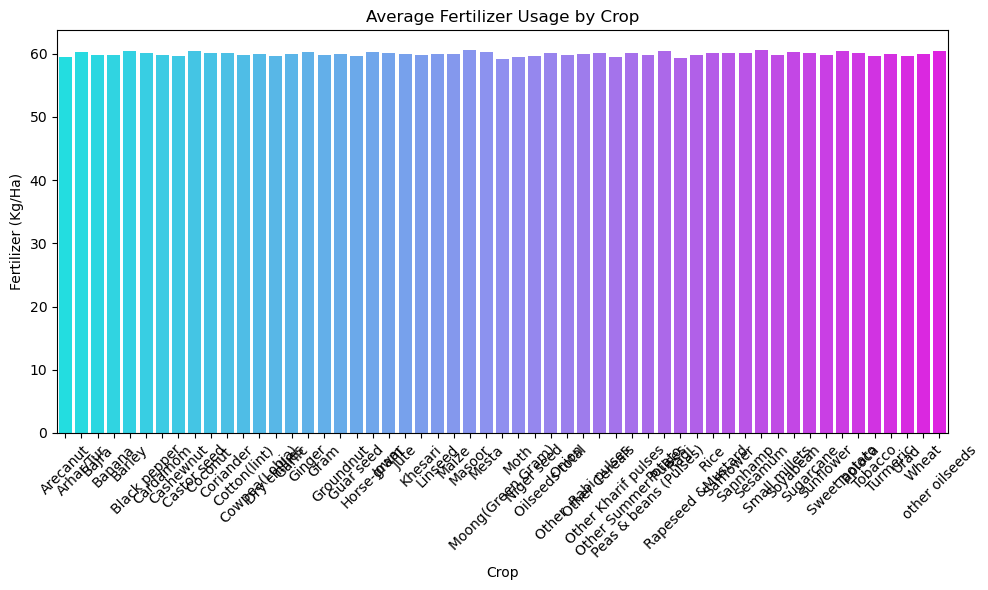

In [123]:
# Bar Plot: Fertilizer Usage by Crop
plt.figure(figsize=(10, 6))
sns.barplot(data=future_df, x='Crop', y='Fertilizer', estimator=np.mean, ci=None, palette='cool')
plt.title('Average Fertilizer Usage by Crop')
plt.ylabel('Fertilizer (Kg/Ha)')
plt.xlabel('Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()